## Pandas for Python Camp

Up to now, you've been introduced to most of Python's core data structures: strings, numerical types, lists, and dictionaries. 

In this lesson, we will look at a third-party Python library that makes working with large datasets easier. 

One of the strengths of Python as a programming language is its ecosystem: the community of Python users is vast and very diverse, and this community supports a great number of projects -- called libraries or packages -- that allow Python developers to benefit from each other's work. 

`pandas` is one such project and probably one of the most popular. 

### Importing `pandas`
Our first step is to import the `pandas` library. 

In importing Python libraries, we can assign them a nickname for convenience using `as`. 

In [2]:
import pandas as pd

If you are **not** using JupyterHub, and if the following code yields a `ModuleNotFoundError`, you probably need to install `pandas` on your computer. You can usually do so within your notebook by typing the following:

`!pip install pandas`

### Reading the data

#### Data source

[HOME VALUES](https://www.zillow.com/research/data/)

>Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. The raw version of that mid-tier ZHVI time series is also available.

>Zillow also publishes ZHVI for all single-family residences (typical value for all single-family homes in a given region), for condo/coops, for all homes with 1, 2, 3, 4 and 5+ bedrooms, and the ZHVI per square foot (typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage). 

#### Notes

This dataset -- a time series of the ZHVI for single-family homes -- has been modified for the purposes of this workshop. Home values are shown only from 2019 to the present, and only for the states of DC, Maryland, and Virginia.  

#### Reading a comma-separated values (CSV) file

If we were to call the `open` method on this file and read it into a variable, we would end up with one giant string, which we would have to parse into rows and columns.

Fortunately, Python has libraries for reading and parsing CSV files. And this functionality is built into the `pandas` library.

In [13]:
# Loading the CSV 
csv_url = 'https://raw.githubusercontent.com/gwu-libraries/gwlibraries-workshops/master/python-camp/zhvi-sfh-sm-sa-month-long-2019-21.csv'
zillow = pd.read_csv(csv_url)

#### Introducing DataFrames

`pandas.read_csv` returns a special Python object called a `DataFrame`.

If you evaluate the `zillow` variable, you'll see something that looks much more like a spreadsheet than a Python list or dictionary. 

In [14]:
zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,month,value
0,66126,31,20002,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,749397.0
1,66133,45,20009,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,834431.0
2,66843,78,21234,Zip,MD,MD,Parkville,Baltimore-Columbia-Towson,Baltimore County,2019-01-31,220814.0
3,67732,80,23464,Zip,VA,VA,Virginia Beach,Virginia Beach-Norfolk-Newport News,Virginia Beach City,2019-01-31,266930.0
4,67730,95,23462,Zip,VA,VA,Virginia Beach,Virginia Beach-Norfolk-Newport News,Virginia Beach City,2019-01-31,211689.0
...,...,...,...,...,...,...,...,...,...,...,...
40405,67491,34322,23031,Zip,VA,VA,Saluda,NaN,Middlesex County,2021-06-30,150773.0
40406,67397,34430,22807,Zip,VA,VA,Harrisonburg,Harrisonburg,Harrisonburg City,2021-06-30,377799.0
40407,67578,34430,23173,Zip,VA,VA,Henrico,Richmond,Henrico County,2021-06-30,311980.0
40408,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2021-06-30,1090119.0


Not all the rows are shown, but we can see at the bottom that there are over 40,000 of them. 

We also have column labels across the top, and **index** labels down the left-hand side. Here the index labels correspond to the row numbers (as in a spreadsheet), but that doesn't have to be the case. We'll see later why that fact proves useful.

A DataFrame, like almost everything in Python, has a data type. But unlike a list or dictionary, a DataFrame is a **user-defined** type, meaning that the creators of the pandas library gave it special methods and properties we can use when working with it.

In [15]:
type(zillow)

pandas.core.frame.DataFrame

#### Accessing elements in a DataFrame

Remember that elements in Python lists can be retrieved by **position** -- by passing an integer inside square brackets.

```
my_list = ['New York', 'California', 'Virginia']
my_list[1] == 'California' # this expression evaluates to True
```
Dictionaries, which were covered briefly in the video you watched, provide access by **key**. The key is a unique identifier (usually a number or string). 

```
my_dict = {'state': 'California', 'capital': 'Sacramento'}
my_dict['state'] == 'California' # this expression evaluates to True
```

The pandas library gives us the best of both worlds. We can access **columns** of a DataFrame by treating the column labels as keys.

In [16]:
zillow['value']

0         749397.0
1         834431.0
2         220814.0
3         266930.0
4         211689.0
           ...    
40405     150773.0
40406     377799.0
40407     311980.0
40408    1090119.0
40409    1434500.0
Name: value, Length: 40410, dtype: float64

Note that we have the same number of rows as before but only a single column of data. But we still have the index (the numbers on the left-hand side), which will come in handy. 

We can access **rows** either by LABEL or by POSITION. 

To do this, we use two special features of the `zillow` DataFrame called `loc` and `iloc`. 

`.loc` gives us the row with the specified label. (Note that `.loc` doesn't follow the syntax for a function: we use square brackets, not parentheses.)

In [17]:
zillow.loc[100]

RegionID               67540
SizeRank                1959
RegionName             23111
RegionType               Zip
StateName                 VA
State                     VA
City          Mechanicsville
Metro               Richmond
CountyName    Hanover County
month             2019-01-31
value                 253540
Name: 100, dtype: object

Here we're looking at a single row, presented with its associated column labels for convenience.

In this case, we can access the same row by swapping `.loc` for `.iloc`, which retrieves a row by its position.

In [18]:
zillow.iloc[100]

RegionID               67540
SizeRank                1959
RegionName             23111
RegionType               Zip
StateName                 VA
State                     VA
City          Mechanicsville
Metro               Richmond
CountyName    Hanover County
month             2019-01-31
value                 253540
Name: 100, dtype: object

To understand the differences between these three ways of accessing elements of a DataFrame, it's useful to imagine a DataFrame as three different Python structures, which are overlaid (as it were) on one another.

1. A DataFrame is **like** a dictionary whose keys are columns and whose values are lists (of all the elements in each column).

In [21]:
data = {'State': ['DC', 'DC', 'MD', 'VA'],
       'values': [749397,834431,220814,266930]}
# The element "DC" repeats because this represents the first four rows of the table, 
# and the state in the first three rows is "DC"

2. A DataFrame also behaves **like** a dictionary whose keys are the **row labels** and whose values are dictionaries, one for each row.

In [23]:
data2 = {0: {'RegionID': 66126, 'SizeRank':31, 'RegionName':20002,'RegionType':'Zip'},
         1: {'RegionID': 66133, 'SizeRank':45, 'RegionName':20009,'RegionType':'Zip'}}
# This is like looking at the first two rows of the data set

3. A DataFrame also behaves like a **list** whose elements are **dictionaries**, one for each row.

In [24]:
data3 = [{'RegionID': 66126, 'SizeRank':31, 'RegionName':20002,'RegionType':'Zip'},
         {'RegionID': 66133, 'SizeRank':45, 'RegionName':20009,'RegionType':'Zip'}]

Given these structures, we can write

In [25]:
data['State']

['DC', 'DC', 'MD', 'VA']

or 

In [26]:
data2[1]

{'RegionID': 66133, 'SizeRank': 45, 'RegionName': 20009, 'RegionType': 'Zip'}

or

In [27]:
data3[1]

{'RegionID': 66133, 'SizeRank': 45, 'RegionName': 20009, 'RegionType': 'Zip'}

but not

In [28]:
data[1]

KeyError: 1

Using a DataFrame, we get the advantages of all three ways of organizing our data in the same Python object (called here `zillow`).

#### Filtering a DataFrame

Often we want to do more than examine a single row. A DataFrame has powerful methods for filtering rows based on conditions applied to elements in one or more columns -- much like Excel or Google Sheets.

But to understand how this works, it's helpful to review Boolean expressions.

In [29]:
x = 1
x == 1

True

The first line assigns the integer `1` to the variable `x`. 
The second tests whether the value stored in `x` is equal to `1`. Evaluating it produces a Boolean result.

But look at what happens when we create a Boolean expression using the column of a DataFrame:

In [30]:
zillow['State'] == 'DC'

0         True
1         True
2        False
3        False
4        False
         ...  
40405    False
40406    False
40407    False
40408    False
40409     True
Name: State, Length: 40410, dtype: bool

What do you notice about this result?

One column of a DataFrame is called a **Series**. This, however, is a Boolean Series, derived from evaluating the predicate `== 'DC'` for every element in the `State` column. (In a Boolean Series, every value is either `True` or `False`.)

Because every Series includes index labels as well as values, and because this Boolean Series is derived from our `zillow` object, we can actually use it to select the rows of the DataFrame where the expression evaluates to `True`.

To do it with one line of code, we write the following:

In [31]:
zillow.loc[zillow['State'] == 'DC']

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,month,value
0,66126,31,20002,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,749397.0
1,66133,45,20009,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,834431.0
6,66135,207,20011,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,666294.0
10,66125,241,20001,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,803589.0
19,66142,325,20019,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,359337.0
...,...,...,...,...,...,...,...,...,...,...,...
39392,66138,7127,20015,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,1342958.0
39424,66136,7787,20012,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,898314.0
39535,66154,10380,20036,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,521676.0
39745,66128,15149,20004,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,521069.0


Note how the index labels on this **slice** of our DataFrame are no longer contiguous. pandas will usually preserve the DataFrame's original index through subsequent operations, which is useful, as we'll see.

Because Boolean expressions in Python can have multiple clauses, we can create complex conditions and pass them to `.loc`, assuming they evaluate to either `True` or `False` for any given row.

For instance, we could use `.loc` to find all rows with states beginning with the letter "N" where the value is greater than or equal to 500,000

#### Exercise
1. Filter the `zillow` DataFrame to show just the rows for a single zip code. The zip code column is called `RegionName`.
2. **Bonus** If we wanted to do the above using the only the variable `data`, `data2`, or `data3` (assuming each one had a complete representation of our data), how would we go about it?

**Answer**
1. `zillow.loc[zillow['RegionName'] == 20016]`
2. At a minimum, we would need a `for` loop and a new list to accumulate our results. Using `data3`, for instance, we could write:
```
my_zip = []
for row in data3:
    if row['RegionName'] == 20016:
        my_zip.append(row)
print(my_zip)
```
A DataFrame allows us to do this operation much more concisely. And more quickly. pandas is optimized to use C code, not Python, to perform iterations. (C is the language the Python interpreter is written in.)

#### Aggregating over a DataFrame

How do we find the zip code with the most expensive homes?

Ignoring change over time for the moment, we can find the row where the `value` is at the max for the whole column.

A Series (column object) in pandas has a `max` method built in.

In [33]:
zillow['value'].max()

2035824.0

But that's just the value from that column. How do we find which row it's associated with?

Instead of asking for the maximum value, we can get the **index label** of the maximum value. 

In [34]:
zillow['value'].idxmax()

40258

On it's own, that's not very useful, but since we can retrieve a row by its label, we can use this result inside of `.loc` to get the row with the max value in the `value` column.

In [35]:
zillow.loc[zillow['value'].idxmax()]

RegionID                          66755
SizeRank                          28699
RegionName                        21056
RegionType                          Zip
StateName                            MD
State                                MD
City                      Gibson Island
Metro         Baltimore-Columbia-Towson
CountyName          Anne Arundel County
month                        2021-06-30
value                       2.03582e+06
Name: 40258, dtype: object

##### Exercise

Pick a zip code. Can you calculate how much home values have **changed** during the time period? (There are different ways to calculate change, but for now, just find the difference between the highest and lowest values for that zip code in the dataset.)

Hints:

- When filtering a DataFrame with `.loc`, the result is also a DataFrame, so it has all the same methods as the original.
- `max` has a twin method called `min` that finds the mininum value.


#### Answer

We can do it in separate steps for clarity: 
1. filter for a zip code
2. get the max and min of the `value` column
3. calculate the difference.

```
my_zip = zillow.loc[zillow['RegionName'] == 20052]
my_zip_max = my_zip['value'].max() 
my_zip_min = my_zip['value'].min()
print(my_zip_max - my_zip_min)
```

#### Aggregating by groups

Can we find the most expensive zip code in each state? 

You may have used pivot tables to address such questions in Excel or Google Sheets. And if you have ever written SQL queries, you may be familiar with `GROUP BY` statements. 

A DataFrame includes a `groupby` method modeled closely on SQL's `GROUP BY` command. Let's see how it works.

There are usually two steps to a `groupby` operation. First, we create a special object by telling the DataFrame which column or columns to group on. This operation effectively subdivides the rows based on the unique values or combinations of values in those columns. 

In this case, we're grouping by state.

In [39]:
states = zillow.groupby(zillow['State']) # On its own, this doesn't produce any output


The next step is to perform an aggregation. 

Aggregations in pandas can be quite complex, but in the simplest case, we can aggregate over the data in a single column.

The aggregation will return a new pandas Series which has the group **keys** -- the unique values to group by -- as its index.

Note that we apply the aggregation function -- in this case, `max` -- to the column, but we reference the column on the intermediate object (the result of our grouping operation), not the original DataFrame.

In [40]:
states['value'].max()

State
DC    1695768.0
MD    2035824.0
VA    1374764.0
Name: value, dtype: float64

What's in this new `states` variable? 

In [41]:
type(states)

pandas.core.groupby.generic.DataFrameGroupBy

You don't need to know about the next two commands, except that they allow us to peak behind the curtain of our `DataFrameGroupBy` object (called here `states`).

In [42]:
next(iter(states))

('DC',
        RegionID  SizeRank  RegionName RegionType StateName State        City  \
 0         66126        31       20002        Zip        DC    DC  Washington   
 1         66133        45       20009        Zip        DC    DC  Washington   
 6         66135       207       20011        Zip        DC    DC  Washington   
 10        66125       241       20001        Zip        DC    DC  Washington   
 19        66142       325       20019        Zip        DC    DC  Washington   
 ...         ...       ...         ...        ...       ...   ...         ...   
 39392     66138      7127       20015        Zip        DC    DC  Washington   
 39424     66136      7787       20012        Zip        DC    DC  Washington   
 39535     66154     10380       20036        Zip        DC    DC  Washington   
 39745     66128     15149       20004        Zip        DC    DC  Washington   
 40409     66169     34430       20052        Zip        DC    DC  Washington   
 
                   

Any guesses as to what we're seeing here?

This is actually a Python tuple, which is another data type, very similar to a list. The first element of the tuple is `DC`, which corresponds to the first value in the alphabetized list of states.

The second element of our tuple is actually a **slice** of our DataFrame that contains just those rows where the state is `DC`. It's similar to what we'd get if we wrote the following: 

In [43]:
zillow.loc[zillow['State'] == 'DC']

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,month,value
0,66126,31,20002,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,749397.0
1,66133,45,20009,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,834431.0
6,66135,207,20011,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,666294.0
10,66125,241,20001,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,803589.0
19,66142,325,20019,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2019-01-31,359337.0
...,...,...,...,...,...,...,...,...,...,...,...
39392,66138,7127,20015,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,1342958.0
39424,66136,7787,20012,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,898314.0
39535,66154,10380,20036,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,521676.0
39745,66128,15149,20004,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,521069.0


So `states['value'].max()` returns the maximum value for the `value` column **in each group**, where the groups are determined by the value of the `State` column.

But perhaps we want to see the rest of the data in those rows, too. 

Handily, we can use `idxmax` on the DataFrameGroupBy object to find the index labels of the rows with the highest value just as we did before. 

Then we can use those indices to filter the original DataFrame.

In [44]:
indices = states['value'].idxmax()
zillow.loc[indices]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,month,value
39137,66132,1352,20008,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,2021-06-30,1695768.0
40258,66755,28699,21056,Zip,MD,MD,Gibson Island,Baltimore-Columbia-Towson,Anne Arundel County,2021-06-30,2035824.0
39212,67148,2957,22102,Zip,VA,VA,McLean,Washington-Arlington-Alexandria,Fairfax County,2021-06-30,1374764.0


#### More complex aggregations

It turns out that the highest values for these three zip codes were recorded in June of this year (the last month available in this version of the data). We might want to know whether that trend is more general. Did most of the zip codes in our sample see an increase in value?

One approach would be to calculate the percentage increase in each zip code over time. If our data are sorted by month, then we can calculate the percentage increase by applying the following formula to each zip code:
```
(last_value - first_value) / first_value
```

To sort our data, we can use the `sort_values` method on the `month` column. 

Note that the values in the column are technically strings, but they are represented in a format that makes for easy sorting. If they were in a different format, we might need to convert them to Python `datetime` types.

In [66]:
zillow = zillow.sort_values('month')

Now we need to create a function to calculate the percentage change in each group. Before creating the function, let's see how we can do this on a single group.

As above, we can filter our (now sorted) DataFrame by the `RegionName` parameter. We can get the contents of the `value` column as follows:

In [78]:
zillow.loc[zillow['RegionName'] == 20016]['value']

112      1253030.0
1459     1255489.0
2806     1264274.0
4153     1273027.0
5500     1285213.0
6847     1292243.0
8194     1294208.0
9541     1297792.0
10888    1299580.0
12235    1302148.0
13582    1301944.0
14929    1305588.0
16276    1315125.0
17623    1324735.0
18970    1329042.0
20317    1334721.0
21664    1323633.0
23011    1321388.0
24358    1317517.0
25705    1330352.0
27052    1338521.0
28399    1346536.0
29746    1357897.0
31093    1367337.0
32440    1374781.0
33787    1384080.0
35134    1398192.0
36481    1411971.0
37828    1438671.0
39175    1461502.0
Name: value, dtype: float64

And we can take the single value from a particular position using `iloc`. Since our data is sorted by date, we can take the value in the first position and the last position as follows. (In Python, using `-1` to index a list or list-like data structure returns the last element in the list.)

In [80]:
values = zillow.loc[zillow['RegionName'] == 20016]['value']
first_value = values.iloc[0]
last_value = values.iloc[-1]
increase = (last_value - first_value) / first_value

Now we will encapsulate this logic in a **user-defined function** so that we can apply it to each group (of zip codes). Every Python function can take one or more arguments, which allow us to pass data into the function to be transformed. The function should also **return** a value in order to have an effect on the rest of our code.

In [82]:
def calculate_increase(values):
    first_value = values.iloc[0]
    last_value = values.iloc[-1]
    increase = (last_value - first_value) / first_value
    return increase

pandas makes it efficient to execute a function for every group in a DataFrame. We use the special `apply` method, which we call from the column to which we want to apply our function.

We can also group on multiple columns -- in this case, by state **and** zip code -- which will arrange our data in a hierarchical way, making it easier to see trends.

In [91]:
zips = zillow.groupby(['State', 'RegionName'])['value'].apply(calculate_increase)

Our new `zips` object is a pandas Series, but it's indexed both by state and zip code. Because it's a Series, we can easily filter by the value of the percentage increase.

**Question**: Which zip codes saw their property values **decline** over this period?

In [93]:
zips.loc[zips < 0]

State  RegionName
MD     21538        -0.092875
       21824        -0.067761
       21867        -0.005707
VA     23173        -0.148305
       23359        -0.051449
       23409        -0.330440
       23410        -0.002098
       23415        -0.021089
       23416        -0.068075
       23418        -0.030297
       23420        -0.008071
       23422        -0.029567
       23480        -0.154099
       23828        -0.007749
       23899        -0.087706
       24131        -0.029284
       24220        -0.102421
       24243        -0.011311
       24256        -0.005466
       24282        -0.182355
       24448        -0.025630
       24485        -0.013908
       24604        -0.025740
       24606        -0.055416
       24635        -0.103919
       24657        -0.100681
Name: value, dtype: float64

##### Exercise

Look for other data points in our `zips` object. How did you go about it?

#### More fun with groups

We can get summary statistics from our grouped object by using the `describe` method. This shows us the statistics for the **percentage increase** in home values, aggregated by zip code across our sample.

In [96]:
zips.describe()

count    1347.000000
mean        0.153687
std         0.071197
min        -0.330440
25%         0.116028
50%         0.149379
75%         0.193734
max         0.677045
Name: value, dtype: float64

Using pandas' built-in visualization methods, we can quickly examine the distribution of the percentage increase across ths sample.

<AxesSubplot:>

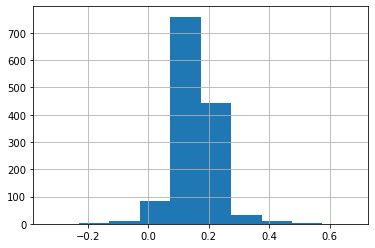

In [105]:
zips.hist()

We can also get the summary statistics for each state by grouping our new Series on its outermost level. (We use levels here because it's a single series of values with a hierarchical index, not a DataFrame with multiple columns.)

In [106]:
zips.groupby(level=0).describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
DC,22.0,0.117354,0.056287,0.018505,0.072832,0.109919,0.164570,0.201144
MD,463.0,0.169968,0.054761,-0.092875,0.137680,0.169605,0.199471,0.495215
VA,862.0,0.145870,0.077463,-0.330440,0.107942,0.135883,0.187562,0.677045


And with slightly different syntax, we can plot histograms for each state separately.

array([[<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'MD'}>],
       [<AxesSubplot:title={'center':'VA'}>, <AxesSubplot:>]],
      dtype=object)

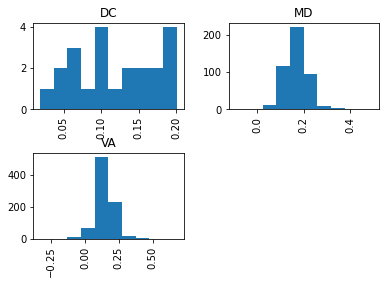

In [107]:
zips.hist(by=zips.index.get_level_values('State'))

### In conclusion

We have just scratched the surface of what's possible with pandas and DataFrames. The library is widely used in academic disciplines as well as in professional fields like finance. It has many applications in machine learning and data science, especially as a tool for cleaning and re-shaping data prior to analysis. 

The pandas [documentation](https://pandas.pydata.org/docs/) is a key source for learning more. 

There are several books on the topic available to GW affiliates through our [Safari Tech Books/O'Reilly](https://www.safaribooksonline.com/library/view/temporary-access) subscription.

And as always, [stackoverflow.com](https://stackoverflow.com/) is a great place to look for recipes from others for doing common tasks in `pandas`.